In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization

from tensorflow.keras.optimizers import Adam

## Data Preparation

In [5]:
for i in os.listdir('./chest_xray/'):
    for j in os.listdir('./chest_xray/' + i + "/"):
        print(f'{str(len(os.listdir("./chest_xray/" + i + "/" + j + "/")))} - {j} - {i} Images')

234 - NORMAL - test Images
390 - PNEUMONIA - test Images
1349 - NORMAL - train Images
3883 - PNEUMONIA - train Images


In [6]:
for i in os.listdir('./chest_xray/'):
    for j in os.listdir('./chest_xray/' + i + "/"):
        for k in os.listdir('./chest_xray/' + i + "/" + j + "/"):
            print(f"{i} - {j} - {k}")

test - NORMAL - IM-0001-0001.jpeg
test - NORMAL - IM-0003-0001.jpeg
test - NORMAL - IM-0005-0001.jpeg
test - NORMAL - IM-0006-0001.jpeg
test - NORMAL - IM-0007-0001.jpeg
test - NORMAL - IM-0009-0001.jpeg
test - NORMAL - IM-0010-0001.jpeg
test - NORMAL - IM-0011-0001-0001.jpeg
test - NORMAL - IM-0011-0001-0002.jpeg
test - NORMAL - IM-0011-0001.jpeg
test - NORMAL - IM-0013-0001.jpeg
test - NORMAL - IM-0015-0001.jpeg
test - NORMAL - IM-0016-0001.jpeg
test - NORMAL - IM-0017-0001.jpeg
test - NORMAL - IM-0019-0001.jpeg
test - NORMAL - IM-0021-0001.jpeg
test - NORMAL - IM-0022-0001.jpeg
test - NORMAL - IM-0023-0001.jpeg
test - NORMAL - IM-0025-0001.jpeg
test - NORMAL - IM-0027-0001.jpeg
test - NORMAL - IM-0028-0001.jpeg
test - NORMAL - IM-0029-0001.jpeg
test - NORMAL - IM-0030-0001.jpeg
test - NORMAL - IM-0031-0001.jpeg
test - NORMAL - IM-0033-0001-0001.jpeg
test - NORMAL - IM-0033-0001-0002.jpeg
test - NORMAL - IM-0033-0001.jpeg
test - NORMAL - IM-0035-0001.jpeg
test - NORMAL - IM-0036-0001

train - PNEUMONIA - person124_virus_240.jpeg
train - PNEUMONIA - person124_virus_242.jpeg
train - PNEUMONIA - person124_virus_244.jpeg
train - PNEUMONIA - person124_virus_245.jpeg
train - PNEUMONIA - person124_virus_246.jpeg
train - PNEUMONIA - person124_virus_247.jpeg
train - PNEUMONIA - person124_virus_249.jpeg
train - PNEUMONIA - person124_virus_250.jpeg
train - PNEUMONIA - person124_virus_251.jpeg
train - PNEUMONIA - person1250_bacteria_3207.jpeg
train - PNEUMONIA - person1251_bacteria_3208.jpeg
train - PNEUMONIA - person1252_bacteria_3209.jpeg
train - PNEUMONIA - person1252_virus_2124.jpeg
train - PNEUMONIA - person1253_bacteria_3211.jpeg
train - PNEUMONIA - person1253_virus_2129.jpeg
train - PNEUMONIA - person1254_virus_2130.jpeg
train - PNEUMONIA - person1255_virus_2132.jpeg
train - PNEUMONIA - person1256_bacteria_3214.jpeg
train - PNEUMONIA - person1257_bacteria_3215.jpeg
train - PNEUMONIA - person1258_bacteria_3216.jpeg
train - PNEUMONIA - person1258_virus_2138.jpeg
train - PN

train - PNEUMONIA - person563_virus_1103.jpeg
train - PNEUMONIA - person564_bacteria_2342.jpeg
train - PNEUMONIA - person564_bacteria_2343.jpeg
train - PNEUMONIA - person564_bacteria_2344.jpeg
train - PNEUMONIA - person564_bacteria_2345.jpeg
train - PNEUMONIA - person564_bacteria_2346.jpeg
train - PNEUMONIA - person564_bacteria_2347.jpeg
train - PNEUMONIA - person564_virus_1104.jpeg
train - PNEUMONIA - person565_bacteria_2348.jpeg
train - PNEUMONIA - person565_virus_1105.jpeg
train - PNEUMONIA - person566_bacteria_2351.jpeg
train - PNEUMONIA - person566_virus_1106.jpeg
train - PNEUMONIA - person567_bacteria_2352.jpeg
train - PNEUMONIA - person567_bacteria_2353.jpeg
train - PNEUMONIA - person567_bacteria_2354.jpeg
train - PNEUMONIA - person567_virus_1107.jpeg
train - PNEUMONIA - person568_bacteria_2358.jpeg
train - PNEUMONIA - person568_bacteria_2359.jpeg
train - PNEUMONIA - person569_bacteria_2360.jpeg
train - PNEUMONIA - person569_bacteria_2362.jpeg
train - PNEUMONIA - person569_bacte

In [7]:
path = []
label = []
for i in os.listdir('./chest_xray/'):
    for j in os.listdir('./chest_xray/' + i + "/"):
        for k in os.listdir('./chest_xray/' + i + "/" + j + "/"):
            path.append("./chest_xray/" + i + "/" + j + "/" + k)
            label.append(j)
            


In [8]:
df = pd.DataFrame(columns=['Path','Label'])
df['Path'] = path
df['Label'] = label

In [9]:
df['filename'] = [i.split('/')[-1] for i in df['Path']]

In [10]:
for i in range(len(df)):
    if df.loc[i, "Label"] == 'PNEUMONIA':
        cls = str(df.loc[i, "filename"]).split('_')[1]
        df.loc[i, "Class"] = cls.upper()
    else:
        df.loc[i, "Class"] = 'NORMAL'

In [11]:
df['Type'] = [i.split('/')[2].title() for i in df['Path']]

In [12]:
for i in range(len(df)):
    X, Y = cv2.imread(df.iloc[i,0]).shape[:-1]
    df.loc[i,'Xsize'] = X
    df.loc[i,'Ysize'] = Y

In [13]:
df.tail()

,Path,Label,filename,Class,Type,Xsize,Ysize
5851,./chest_xray/train/PNEUMONIA/person99_virus_18...,PNEUMONIA,person99_virus_183.jpeg,VIRUS,Train,882.0,1414.0
5852,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_38.jpeg,BACTERIA,Train,696.0,1256.0
5853,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_39.jpeg,BACTERIA,Train,856.0,1152.0
5854,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_40.jpeg,BACTERIA,Train,728.0,1248.0
5855,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_41.jpeg,BACTERIA,Train,784.0,1176.0


In [14]:
df.head()

,Path,Label,filename,Class,Type,Xsize,Ysize
0,./chest_xray/test/NORMAL/IM-0001-0001.jpeg,NORMAL,IM-0001-0001.jpeg,NORMAL,Test,1317.0,1857.0
1,./chest_xray/test/NORMAL/IM-0003-0001.jpeg,NORMAL,IM-0003-0001.jpeg,NORMAL,Test,1509.0,2111.0
2,./chest_xray/test/NORMAL/IM-0005-0001.jpeg,NORMAL,IM-0005-0001.jpeg,NORMAL,Test,1837.0,2031.0
3,./chest_xray/test/NORMAL/IM-0006-0001.jpeg,NORMAL,IM-0006-0001.jpeg,NORMAL,Test,1326.0,1663.0
4,./chest_xray/test/NORMAL/IM-0007-0001.jpeg,NORMAL,IM-0007-0001.jpeg,NORMAL,Test,1818.0,2053.0


In [6]:
def creating_data(filepath):
    path = []
    label = []
    for i in os.listdir(str(filepath)):
        for j in os.listdir(filepath + i + "/"):
            for k in os.listdir(filepath + i + "/" + j + "/"):
                path.append(filepath + i + "/" + j + "/" + k)
                label.append(j)
                
    df = pd.DataFrame(columns=['Path','Label'])
    df['Path'] = path
    df['Label'] = label
    
    df['filename'] = [i.split('/')[-1] for i in df['Path']]
    
    for i in range(len(df)):
        if df.loc[i, "Label"] == 'PNEUMONIA':
            cls = str(df.loc[i, "filename"]).split('_')[1]
            df.loc[i, "Class"] = cls.upper()
        else:
            df.loc[i, "Class"] = 'NORMAL'
    df['Type'] = [i.split('/')[2].title() for i in df['Path']]
    
    for i in range(len(df)):
        img = cv2.imread(df.iloc[i,0])
        X, Y = img.shape[:-1]
        df.loc[i,'Xsize'] = X
        df.loc[i,'Ysize'] = Y
        df.loc[i,'Brightness_mean'] = np.mean(img)
        df.loc[i,'Brightness_std'] = np.std(img)
    
    return df

In [7]:
data = creating_data("./chest_xray/")

In [8]:
data.head()

,Path,Label,filename,Class,Type,Xsize,Ysize,Brightness_mean,Brightness_std
0,./chest_xray/test/NORMAL/IM-0001-0001.jpeg,NORMAL,IM-0001-0001.jpeg,NORMAL,Test,1317.0,1857.0,130.998608,57.102032
1,./chest_xray/test/NORMAL/IM-0003-0001.jpeg,NORMAL,IM-0003-0001.jpeg,NORMAL,Test,1509.0,2111.0,142.445303,60.668227
2,./chest_xray/test/NORMAL/IM-0005-0001.jpeg,NORMAL,IM-0005-0001.jpeg,NORMAL,Test,1837.0,2031.0,136.249559,55.404084
3,./chest_xray/test/NORMAL/IM-0006-0001.jpeg,NORMAL,IM-0006-0001.jpeg,NORMAL,Test,1326.0,1663.0,148.670080,42.324957
4,./chest_xray/test/NORMAL/IM-0007-0001.jpeg,NORMAL,IM-0007-0001.jpeg,NORMAL,Test,1818.0,2053.0,137.699779,53.966271


In [9]:
data.tail()

,Path,Label,filename,Class,Type,Xsize,Ysize,Brightness_mean,Brightness_std
5851,./chest_xray/train/PNEUMONIA/person99_virus_18...,PNEUMONIA,person99_virus_183.jpeg,VIRUS,Train,882.0,1414.0,115.919149,61.979300
5852,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_38.jpeg,BACTERIA,Train,696.0,1256.0,132.410676,53.865933
5853,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_39.jpeg,BACTERIA,Train,856.0,1152.0,127.775479,49.761992
5854,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_40.jpeg,BACTERIA,Train,728.0,1248.0,144.695149,51.411900
5855,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_41.jpeg,BACTERIA,Train,784.0,1176.0,114.959131,48.046780


## Data Visualization

In [19]:
import seaborn as sns

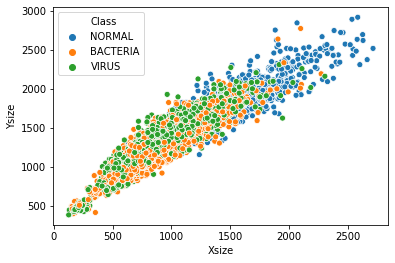

In [20]:
sns.scatterplot(x = data['Xsize'], y = data['Ysize'], hue = data['Class'])
plt.show()

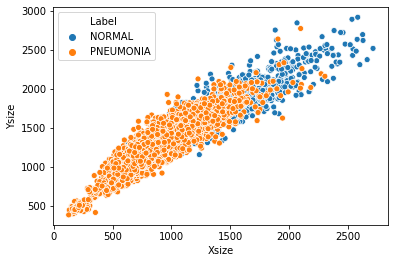

In [21]:
sns.scatterplot(x = data['Xsize'], y = data['Ysize'], hue = data['Label'])
plt.show()

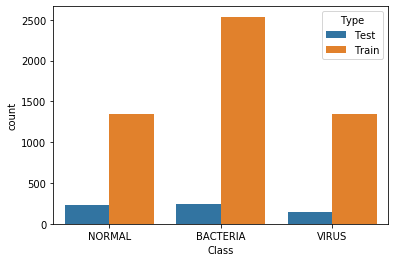

In [22]:
sns.countplot(x= data['Class'], hue= data['Type'])
plt.show()

In [23]:
data

,Path,Label,filename,Class,Type,Xsize,Ysize,Brightness_mean,Brightness_std
0,./chest_xray/test/NORMAL/IM-0001-0001.jpeg,NORMAL,IM-0001-0001.jpeg,NORMAL,Test,1317.0,1857.0,130.998608,57.102032
1,./chest_xray/test/NORMAL/IM-0003-0001.jpeg,NORMAL,IM-0003-0001.jpeg,NORMAL,Test,1509.0,2111.0,142.445303,60.668227
2,./chest_xray/test/NORMAL/IM-0005-0001.jpeg,NORMAL,IM-0005-0001.jpeg,NORMAL,Test,1837.0,2031.0,136.249559,55.404084
3,./chest_xray/test/NORMAL/IM-0006-0001.jpeg,NORMAL,IM-0006-0001.jpeg,NORMAL,Test,1326.0,1663.0,148.670080,42.324957
4,./chest_xray/test/NORMAL/IM-0007-0001.jpeg,NORMAL,IM-0007-0001.jpeg,NORMAL,Test,1818.0,2053.0,137.699779,53.966271
...,...,...,...,...,...,...,...,...,...
5851,./chest_xray/train/PNEUMONIA/person99_virus_18...,PNEUMONIA,person99_virus_183.jpeg,VIRUS,Train,882.0,1414.0,115.919149,61.979300
5852,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_38.jpeg,BACTERIA,Train,696.0,1256.0,132.410676,53.865933
5853,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_39.jpeg,BACTERIA,Train,856.0,1152.0,127.775479,49.761992
5854,./chest_xray/train/PNEUMONIA/person9_bacteria_...,PNEUMONIA,person9_bacteria_40.jpeg,BACTERIA,Train,728.0,1248.0,144.695149,51.411900


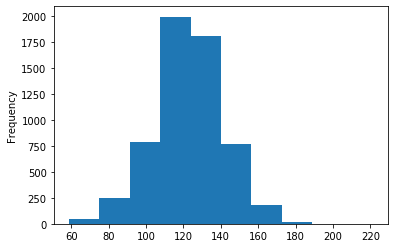

In [24]:
data['Brightness_mean'].plot(kind='hist')
plt.show()

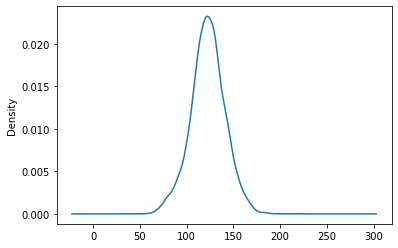

In [25]:
data['Brightness_mean'].plot(kind='kde')
plt.show()

Text(0.5, 1.0, 'BACTERIA')

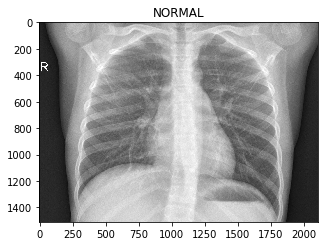

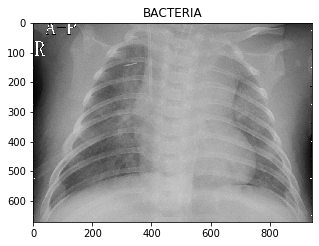

In [26]:
plt.figure(figsize = (5,5))
plt.imshow(cv2.imread(df.iloc[1,0]), cmap='gray')
plt.title(df.loc[1,'Class'])

plt.figure(figsize = (5,5))
plt.imshow(cv2.imread(df.iloc[3500,0]), cmap='gray')
plt.title(df.loc[3500,'Class'])

### Creating Training and Test Dataset

In [196]:
data.to_csv('pneumonia_dataset.csv',index=False)

In [10]:
data = pd.read_csv('pneumonia_dataset.csv').drop(['Unnamed: 0'],axis=1)
data.head()

,Path,Label,filename,Class,Type,Xsize,Ysize,Brightness_mean,Brightness_std
0,./chest_xray/test/NORMAL/IM-0001-0001.jpeg,NORMAL,IM-0001-0001.jpeg,NORMAL,Test,1317.0,1857.0,130.998608,57.102032
1,./chest_xray/test/NORMAL/IM-0003-0001.jpeg,NORMAL,IM-0003-0001.jpeg,NORMAL,Test,1509.0,2111.0,142.445303,60.668227
2,./chest_xray/test/NORMAL/IM-0005-0001.jpeg,NORMAL,IM-0005-0001.jpeg,NORMAL,Test,1837.0,2031.0,136.249559,55.404084
3,./chest_xray/test/NORMAL/IM-0006-0001.jpeg,NORMAL,IM-0006-0001.jpeg,NORMAL,Test,1326.0,1663.0,148.670080,42.324957
4,./chest_xray/test/NORMAL/IM-0007-0001.jpeg,NORMAL,IM-0007-0001.jpeg,NORMAL,Test,1818.0,2053.0,137.699779,53.966271


In [31]:
def create_dataset(data):
    trainXdata = []
    trainYdata = []
    testXdata = []
    testYdata = []
    img_size = 150
    labels = ['NORMAL','PNEUMONIA']
    for i in range(len(data)):
        if data.loc[i,'Type'] == 'Train':
            img = image.load_img(data.loc[i,'Path'],target_size=(img_size,img_size),grayscale=True)
            img = image.img_to_array(img)
            img = np.array(img)
            trainXdata.append(img)
            trainYdata.append(labels.index(data.loc[i,'Label']))
        else:
            img = image.load_img(data.loc[i,'Path'],target_size=(img_size,img_size),grayscale=True)
            img = image.img_to_array(img)
            img = np.array(img)
            testXdata.append(img)
            testYdata.append(labels.index(data.loc[i,'Label']))
    Xdata = np.array(trainXdata)
    Ydata = np.array(testXdata)
    
    trainXdata = np.array(trainXdata) / 255
    trainYdata = np.array(trainYdata)
    testXdata = np.array(testXdata) / 255
    testYdata = np.array(testYdata)
    
    return trainXdata, trainYdata, testXdata, testYdata, Xdata, Ydata

In [32]:
trainXdata, trainYdata, testXdata, testYdata, Xdata, Ydata = create_dataset(data)

In [33]:
trainXdata.shape, trainYdata.shape

((5232, 150, 150, 1), (5232,))

In [34]:
testXdata.shape, testYdata.shape

((624, 150, 150, 1), (624,))

In [35]:
Xdata.shape, Xdata.shape

((5232, 150, 150, 1), (5232, 150, 150, 1))

In [36]:
Ydata.shape, Ydata.shape

((624, 150, 150, 1), (624, 150, 150, 1))

In [32]:
np.save('./training/trainingX',trainXdata)
np.save('./training/trainYdata',trainYdata)
np.save('./testing/testXdata',testXdata)
np.save('./testing/testYdata',testYdata)

In [37]:
Xdata

array([[[[ 24.],
         [ 18.],
         [ 16.],
         ...,
         [ 93.],
         [ 97.],
         [ 95.]],

        [[ 24.],
         [ 20.],
         [ 18.],
         ...,
         [ 94.],
         [ 94.],
         [ 93.]],

        [[ 21.],
         [ 21.],
         [ 19.],
         ...,
         [ 95.],
         [ 90.],
         [ 91.]],

        ...,

        [[ 27.],
         [ 28.],
         [ 26.],
         ...,
         [ 39.],
         [ 41.],
         [ 40.]],

        [[ 29.],
         [ 29.],
         [ 28.],
         ...,
         [ 67.],
         [ 64.],
         [ 65.]],

        [[ 39.],
         [ 41.],
         [ 43.],
         ...,
         [100.],
         [ 99.],
         [ 99.]]],


       [[[ 17.],
         [ 22.],
         [ 31.],
         ...,
         [ 28.],
         [ 30.],
         [ 20.]],

        [[ 16.],
         [ 28.],
         [ 35.],
         ...,
         [ 27.],
         [ 27.],
         [ 19.]],

        [[ 16.],
         [ 27.],
      